In [1]:
#import necessary libraries files 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# DATA LOADING# 

In [2]:
#import dataset
df=pd.read_csv("hpc_breakdowns.csv")
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.shape

(2049280, 10)

In [4]:
df.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.047237e+06,2.048803e+06,2.047249e+06,2.047279e+06,2.047983e+06,2.048070e+06,2.049151e+06
mean,1.031496e+06,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,5.964586e+05,1.057290e+00,1.127240e-01,3.238838e+00,4.444695e+00,6.153978e+00,5.823372e+00,8.437150e+00
min,0.000000e+00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.162538e+05,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.028638e+06,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.545307e+06,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2.075258e+06,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
Unnamed: 0               int64
Date                     object
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), int64(1), object(2)
memory usage: 156.3+ MB


In [6]:
#Features columns 
df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Global_active_power',
       'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

In [7]:
df1=df.drop(['Unnamed: 0','Date','Time','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,4.216,0.418,234.84,18.4
1,5.360,0.436,233.63,23.0
2,5.374,0.498,233.29,23.0
3,5.388,0.502,233.74,23.0
4,3.666,0.528,235.68,15.8


In [8]:
df1.isnull().any()

Global_active_power      True
Global_reactive_power    True
Voltage                  True
Global_intensity         True
dtype: bool

In [9]:
print(df1.isnull().sum())

Global_active_power      2043
Global_reactive_power     477
Voltage                  2031
Global_intensity         2001
dtype: int64


In [10]:
# Replace using median 
median = df1['Global_active_power'].median()
df1['Global_active_power'].fillna(median, inplace=True)

In [11]:
#Replace using median
median=df1['Global_reactive_power'].median()
df1['Global_reactive_power'].fillna(median,inplace=True)

In [12]:
#Replace using median
median=df1['Voltage'].median()
df1['Voltage'].fillna(median,inplace=True)

In [13]:
#Replace using median
median=df1['Global_intensity'].median()
df1['Global_intensity'].fillna(median,inplace=True)

E:\anacounda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\muttu\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\muttu\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
E:\anacounda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\anacounda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


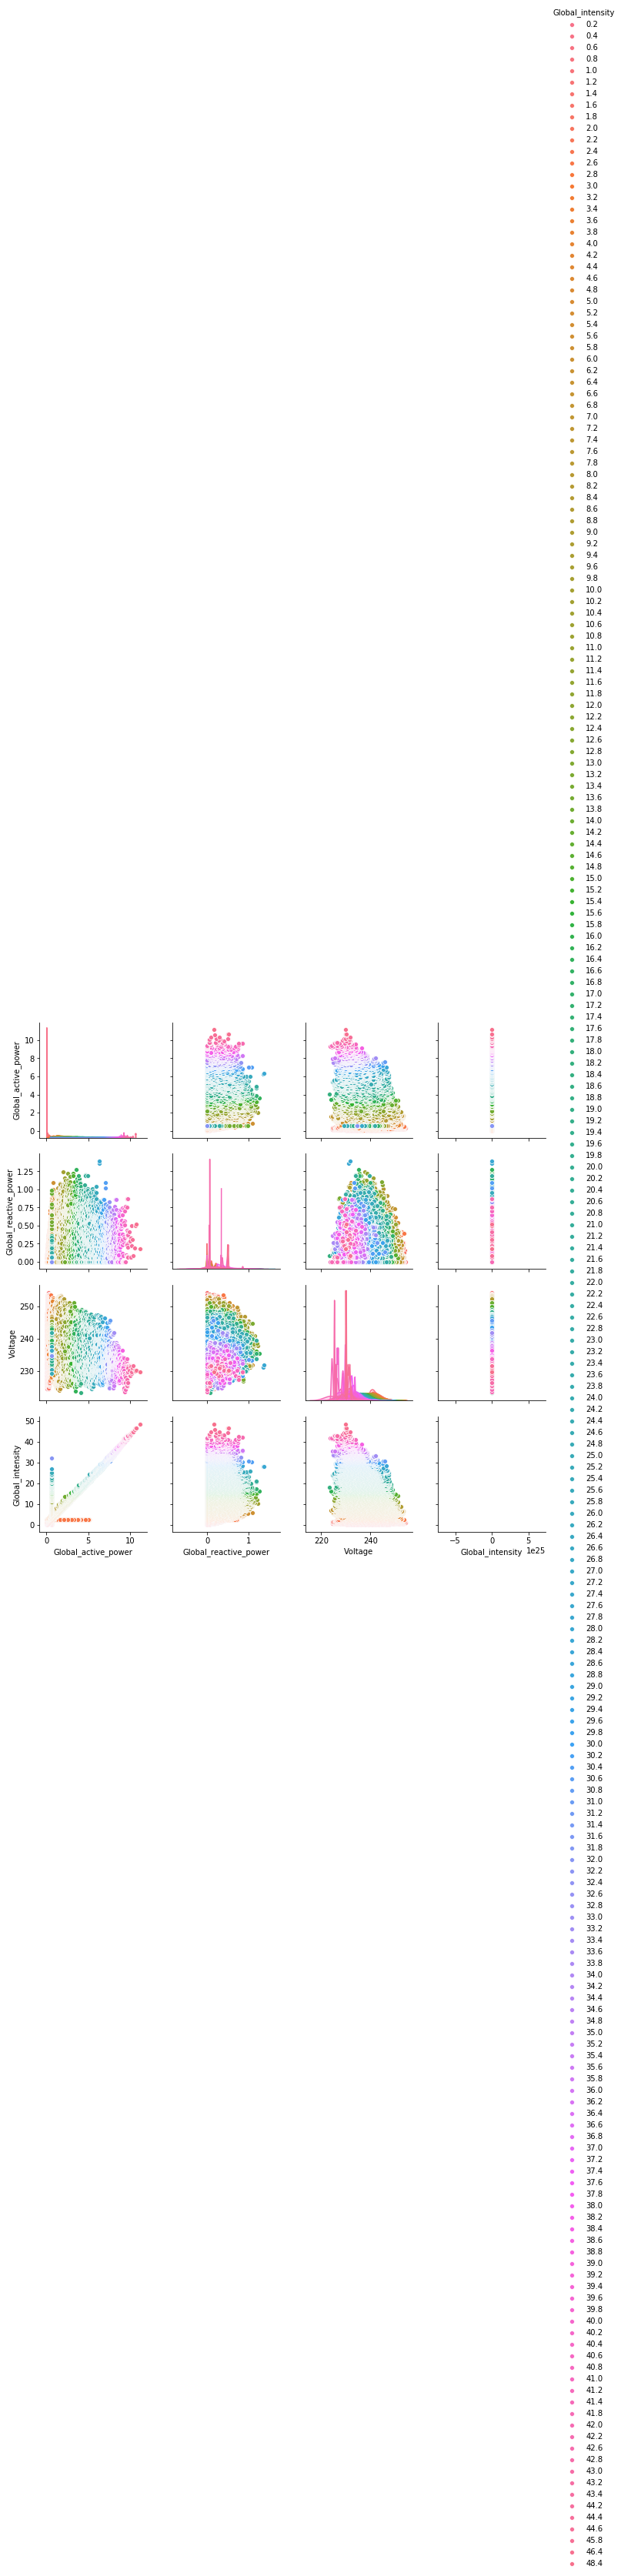

In [14]:
sns.pairplot(df1, hue='Global_intensity', size=2.5);

In [15]:
#now check nan values 
print(df1.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
dtype: int64


In [16]:
df1.loc[df1['Global_intensity']<=15,'Global_intensity']=0
df1.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,4.216,0.418,234.84,18.4
1,5.360,0.436,233.63,23.0


In [17]:
df1.loc[df1['Global_intensity']>15,'Global_intensity']=1
df1.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,4.216,0.418,234.84,1.0
1,5.360,0.436,233.63,1.0
2,5.374,0.498,233.29,1.0
3,5.388,0.502,233.74,1.0
4,3.666,0.528,235.68,1.0


In [18]:
df1[df1['Global_intensity']==1]
df1.head(4)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,4.216,0.418,234.84,1.0
1,5.360,0.436,233.63,1.0
2,5.374,0.498,233.29,1.0
3,5.388,0.502,233.74,1.0


In [19]:
#drop the Sub_metering_1 colums bec this is target 
x=df2=df1.drop(['Global_intensity'],axis=1)
x.head(3)

,Global_active_power,Global_reactive_power,Voltage
0,4.216,0.418,234.84
1,5.360,0.436,233.63
2,5.374,0.498,233.29


In [20]:
y=df1['Global_intensity']
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Global_intensity, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [23]:
len(x_train)

1434496

In [24]:
len(y_train)

1434496

In [25]:
len(x_test)

614784

In [26]:
len(y_test)

614784

In [27]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

E:\anacounda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.998478908271616

In [28]:
y_predicted=model.predict(x_test)

In [29]:
# another way of getting score from precision & recall
from sklearn.metrics import classification_report
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    591405
         1.0       0.98      0.98      0.98     23379

    accuracy                           1.00    614784
   macro avg       0.99      0.99      0.99    614784
weighted avg       1.00      1.00      1.00    614784



In [36]:
y_predicted = model.predict(x_train)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_predicted)
cm

array([[1379258,    1067],
       [   1115,   53056]], dtype=int64)

Text(69.0, 0.5, 'Truth')

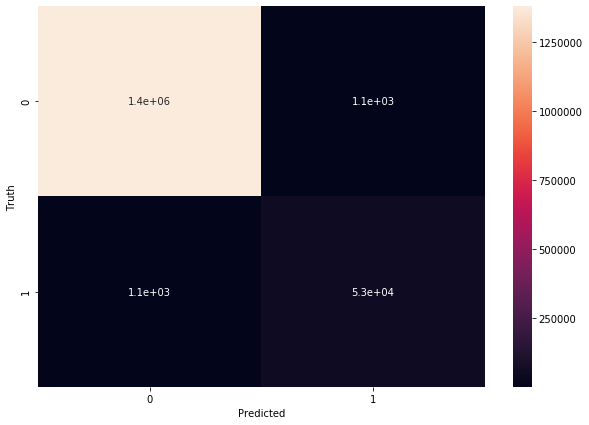

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')